# Data Science Nordeus Challenge

## Overview

This project is a part of the Data Science Challenge and focuses on building a predictive model for league rankings. It encompasses a sequence of steps: data preprocessing, feature engineering, model development, and evaluation. The goal is to predict league ranks as accurately as possible and provide these predictions in an output file named `predictions.csv.`

In [830]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [831]:
df = pd.read_csv("jobfair_train.csv")

In [832]:
df.head(10)

,season,club_id,league_id,dynamic_payment_segment,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,...,registration_country,registration_platform_specific,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
0,173,6042825,2912348,2) Minnow,134,25,5.255151,4.483009,1.778801,25,...,Portugal,Flash FB Canvas,24,435,11.0,598,245,186,818,2
1,173,9620967,2912140,2) Minnow,28,23,4.962521,4.785648,-0.002687,28,...,Turkey,Android Phone,19,58,7.0,269,0,35,24,2
2,173,6045474,2912933,4) Whale,136,23,11.105782,10.511133,0.628794,28,...,Belgium,Flash FB Canvas,26,116,8.0,23180,369,444,4933,1
3,173,14187773,2910371,0) NonPayer,2,21,4.164848,4.023486,0.551904,12,...,Malaysia,Android Phone,11,22,2.0,41,43,213,126,6
4,173,13694853,2907632,0) NonPayer,5,22,3.031939,2.926029,0.690544,0,...,Italy,iOS Phone,9,0,4.0,0,16,100,147,10
5,173,5990762,2912548,0) NonPayer,104,23,5.165491,5.014962,0.508691,28,...,Italy,iOS Phone,18,66,3.0,117,32,52,28,2
6,173,14223642,2911299,2) Minnow,2,23,5.331697,5.165514,0.260603,25,...,Cambodia,iOS Phone,21,105,6.0,313,19,48,27,2
7,173,11709507,2910371,0) NonPayer,16,24,3.881236,3.727657,0.587786,1,...,Indonesia,Android Phone,12,2,NaN,9,25,97,181,12
8,173,14492950,2905919,0) NonPayer,1,27,4.307879,4.078724,0.442616,7,...,Algeria,Android Phone,6,22,1.0,78,4,6,66,7
9,173,14436853,2906383,0) NonPayer,1,22,3.757782,3.536762,0.611114,3,...,Spain,Android Phone,14,12,NaN,47,39,31,66,5


## Dataset Summary

In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   55314 non-null  int64  
 1   club_id                                  55314 non-null  int64  
 2   league_id                                55314 non-null  int64  
 3   dynamic_payment_segment                  55314 non-null  object 
 4   cohort_season                            55314 non-null  int64  
 5   avg_age_top_11_players                   55314 non-null  int64  
 6   avg_stars_top_11_players                 55314 non-null  float64
 7   avg_stars_top_14_players                 55314 non-null  float64
 8   avg_training_factor_top_11_players       55314 non-null  float64
 9   days_active_last_28_days                 55314 non-null  int64  
 10  league_match_watched_count_last_28_days  55314

In [834]:
df.describe()

,season,club_id,league_id,cohort_season,avg_age_top_11_players,avg_stars_top_11_players,avg_stars_top_14_players,avg_training_factor_top_11_players,days_active_last_28_days,league_match_watched_count_last_28_days,session_count_last_28_days,playtime_last_28_days,league_match_won_count_last_28_days,training_count_last_28_days,global_competition_level,tokens_spent_last_28_days,tokens_stash,rests_stash,morale_boosters_stash,league_rank
count,55314.0,5.531400e+04,5.531400e+04,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000,5.531400e+04,55314.000000,55314.000000,37763.000000,55314.000000,55314.000000,55314.000000,55314.000000,55314.000000
mean,173.0,1.210977e+07,2.909804e+06,23.409372,23.718661,4.533516,4.344776,0.584372,12.357089,3.623170,63.432169,2.955178e+07,12.411813,61.107694,3.901014,121.393897,113.133077,283.083523,307.085964,7.500000
std,0.0,3.384016e+06,2.102140e+03,42.009274,2.206240,1.204753,1.177068,0.178090,11.849102,5.906055,101.831670,5.233892e+07,6.403013,188.288285,2.625576,842.775529,3183.550398,789.250959,823.362486,4.031165
min,173.0,2.750000e+02,2.904743e+06,1.000000,18.000000,1.451697,1.354905,-1.287736,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-4975.000000,-169.000000,0.000000,1.000000
25%,173.0,1.151105e+07,2.907961e+06,2.000000,22.000000,3.691136,3.500062,0.479571,1.000000,0.000000,1.000000,7.364150e+04,8.000000,0.000000,1.000000,0.000000,11.000000,41.000000,52.000000,4.000000
50%,173.0,1.392822e+07,2.910038e+06,4.000000,23.000000,4.481376,4.311590,0.561158,7.000000,0.000000,16.000000,6.230431e+06,12.000000,11.000000,3.000000,38.000000,29.000000,88.000000,118.000000,7.500000
75%,173.0,1.424454e+07,2.911697e+06,17.000000,25.000000,5.217394,5.021726,0.648180,27.000000,5.000000,89.000000,3.768711e+07,17.000000,63.000000,6.000000,107.000000,73.000000,243.000000,281.000000,11.000000
max,173.0,1.451477e+07,2.912940e+06,172.000000,33.000000,23.716073,20.434876,5.164494,28.000000,26.000000,1365.000000,1.340479e+09,26.000000,7443.000000,11.000000,120233.000000,744202.000000,32767.000000,32767.000000,14.000000


### Based on the dataset summary here's what we can learn about dataset:

- The dataset contains 55 314 entries (rows) and 23 columns
- There are integer (`int64`), floating point (`float64`), and object (strings) data types
- Missing values: Only the `global_competition_level` column has missing values (37763 non-null out of 55314)

### Data Preprocessing Needs:

- The object-type columns (`dynamic_payment_segment`, `registration_country`, `registration_platform_specific`) will likely need to be encoded
- The missing values in `global_competition_level` need to be handled
- The dataset may benefit from feature scaling, especially if using algorithms sensitive to feature magnitude

## Handling Missing Data

- We have 17551 rows of missing data in `global_competition_level` column which is aprox 32% of all data
- Typically, a column with as much as 30% missing data might be dropped, but given the potential significance of `global_competition_level` as a predictor, we will explore imputing these missing values to retain and utilize this potentially valuable feature
- Since `global_competition_level` is a numerical column, mean or median imputation could be appropriate
- Imputation choice can depend on the distribution of the column
- We are going to check the distribution of the data in `global_competition_level` by plotting Histogram and Density plot and Q-Q plot

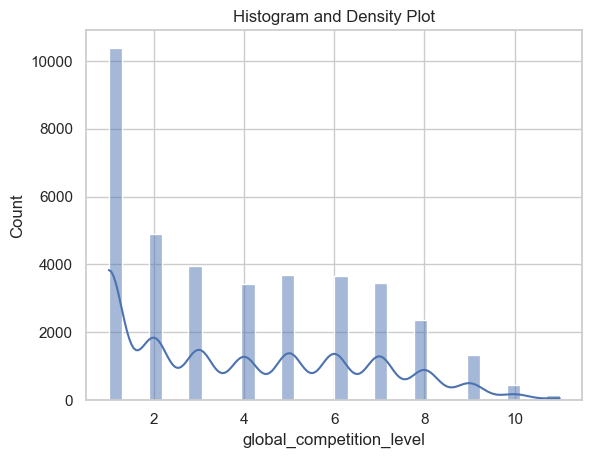

In [835]:
# Histogram and Density Plot
sns.histplot(df['global_competition_level'].dropna(), kde=True)
plt.title('Histogram and Density Plot')
plt.show()

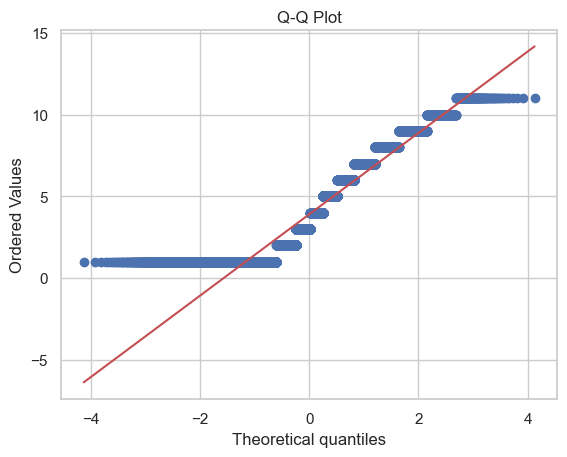

In [836]:
# Q-Q Plot
stats.probplot(df['global_competition_level'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

### Conclusion

The histogram and density plot do not indicate a normal or symmetric distribution for the `global_competition_level` variable. The distribution appears to be multi-modal with significant variance in frequencies across different levels. This suggests that the data points are not evenly spread around the **mean**, and the mean imputation might not be the best approach as it could introduce bias.

In the Q-Q plot the points bending upwards at both ends suggest the presence of outliers in both the lower and upper ranges of the data.

Since the data is not normally distributed and has outliers, using the **median** to fill in the missing values could be a better choice than the mean as the median is less affected by skewness and outliers.



### Cleaning Missing Data

In [837]:
# Impute missing values with the median
median_value = df['global_competition_level'].median()
df['global_competition_level'].fillna(median_value, inplace=True)

# Confirm that there are no more missing values
print(df['global_competition_level'].isnull().sum())

0


### Categorical encoding

Categorical encoding is a process of converting categorical data into numerical format so that it can be provided to machine learning algorithms. From the dataset summary, the following columns contain categorical data:

- `dynamic_payment_segment`
- `registration_country`
- `registration_platform_specific`

For`dynamic_payment_segment` which has an inherent order (NonPayer, ExPayer, Minnow, Dolphin, Whale), we will use ordinal encoding.

We will remove the `registration_country` and `registration_platform_specific` columns due to their limited relevance to our target variable and to simplify our model. This step will reduce the dataset's complexity and potentially improve the model's performance by focusing on more impactful features.

In [838]:
# Define a mapping from category to number
payment_segment_mapping = {
    '0) NonPayer': 0,
    '1) ExPayer': 1,
    '2) Minnow': 2,
    '3) Dolphin': 3,
    '4) Whale': 4
}

# Apply the mapping to the column
df['dynamic_payment_segment'] = df['dynamic_payment_segment'].map(payment_segment_mapping)


In [839]:
# Drop 'registration_country' and 'registration_platform_specific' columns
df = df.drop(['registration_country', 'registration_platform_specific'], axis=1)

### Checking for multicolinearity

The correlation matrix is crucial in data analysis as it quantifies the linear relationships between variables.

When two features are highly correlated, one of them is often dropped to reduce multicollinearity, a condition that can lead to redundancy in the information the features provide. This helps in simplifying the model and improving its interpretability, as highly correlated features can make it difficult to determine the independent effect of each feature on the target variable.

In [840]:
correlation_matrix = df.corr()

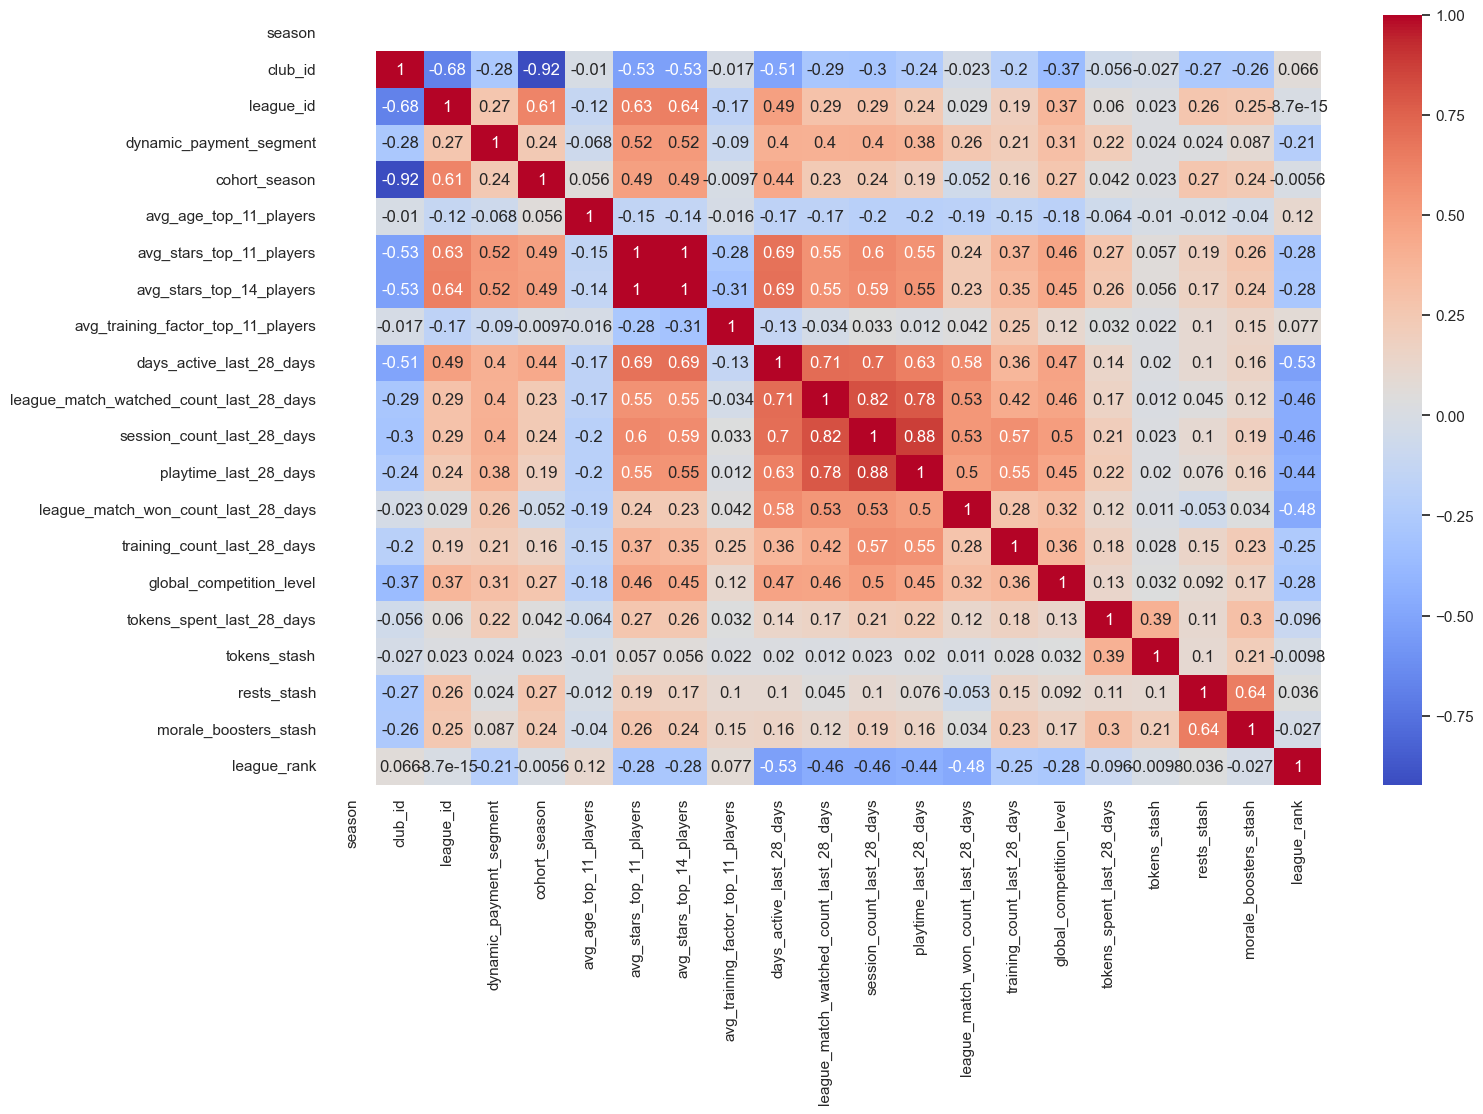

In [841]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [842]:
# Setting a threshold for identifying high correlations
threshold = 0.8

# Find pairs of highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_pairs.append((correlation_matrix.columns[j], colname))

print("Highly correlated pairs:\n", high_corr_pairs)


Highly correlated pairs:
 [('club_id', 'cohort_season'), ('avg_stars_top_11_players', 'avg_stars_top_14_players'), ('league_match_watched_count_last_28_days', 'session_count_last_28_days'), ('session_count_last_28_days', 'playtime_last_28_days')]


In [843]:
# Removing one feature from each highly correlated pair
features_to_remove = ['cohort_season', 'avg_stars_top_14_players', 
                      'session_count_last_28_days', 'season']

df = df.drop(features_to_remove, axis=1)

## Building the model

We will experiment with various models to ultimately select the one that offers the most accurate predictions.

In [844]:
X = df.drop('league_rank', axis=1)
y = df['league_rank']

In [845]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [846]:
scaler = StandardScaler()
df_scaled = df.copy()

features_to_scale = df_scaled.drop(['league_rank','dynamic_payment_segment'], axis=1).columns
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

X_scaled = df_scaled.drop('league_rank', axis=1)
y_scaled = df_scaled['league_rank']

X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [847]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train_scaled)

# Predict on the validation set
y_pred_linear = linear_model.predict(X_val_scaled)

# Evaluate the model using Mean Absolute Error
mae_linear = mean_absolute_error(y_val_scaled, y_pred_linear)
print(f'Mean Absolute Error with Linear Regression: {mae_linear}')


Mean Absolute Error with Linear Regression: 2.5710549896054755


In [848]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model

ridge_model.fit(X_train_scaled, y_train_scaled)

# Predict on the validation set
y_pred_ridge = ridge_model.predict(X_val_scaled)

# Evaluate the model using Mean Absolute Error
mae_ridge = mean_absolute_error(y_val_scaled, y_pred_ridge)
print(f'Mean Absolute Error with Ridge Regression: {mae_ridge}')


Mean Absolute Error with Ridge Regression: 2.571043023744255


In [849]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the model
rf = RandomForestRegressor()

# Train the model
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error on Validation Set: {mae}')

Mean Absolute Error on Validation Set: 2.279152128717346


In [850]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor()

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = gbr_model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.3560093147634085


In [ ]:
pip install xgboost

In [851]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

params = {
    'max_depth': 15,
    'eta': 0.1,
    'objective': 'reg:squarederror',
}

num_round = 100



# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)

# Evaluate predictions using MAE
mae = mean_absolute_error(y_val, preds)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.3285617306350335


### Predictions 

We will ensure that the test dataset undergoes the same cleaning and preprocessing steps as the training dataset to maintain consistency.

In [853]:
df_test = pd.read_csv("jobfair_test.csv")

# Impute missing values with the median
median_value = df_test['global_competition_level'].median()
df_test['global_competition_level'].fillna(median_value, inplace=True)

# Define a mapping from category to number
payment_segment_mapping = {
    '0) NonPayer': 0,
    '1) ExPayer': 1,
    '2) Minnow': 2,
    '3) Dolphin': 3,
    '4) Whale': 4
}

# Apply the mapping to the column
df_test['dynamic_payment_segment'] = df_test['dynamic_payment_segment'].map(payment_segment_mapping)

# Drop 'registration_country' and 'registration_platform_specific' columns
df_test = df_test.drop(['registration_country', 'registration_platform_specific'], axis=1)

features_to_remove = ['cohort_season', 'avg_stars_top_14_players', 
                      'session_count_last_28_days', 'season']

df_test= df_test.drop(features_to_remove, axis=1)

In [854]:
y_pred = rf.predict(df_test)

In [858]:
rounded_predictions = np.rint(y_pred).astype(int)

In [867]:
output_df = pd.DataFrame({
    'club_id': df_test['club_id'],
    'league_rank': rounded_predictions
})

In [868]:
output_df.to_csv('predictions.csv', index=False)